<a href="https://colab.research.google.com/github/DannyCollinson/EMIT-ECOSTRESS/blob/Data/Data_Cleaning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pickle

import numpy as np
import matplotlib.pyplot as plt

In [31]:
emit_num = '003'
ecostress_tag = 'SMT'
emit_path = f'/content/drive/Shareddrives/emit-ecostress/Data/02_Resampling_ECOSTRESS_EMIT_Matchup/emit_{emit_num}x{ecostress_tag}_unclean.pkl'
ecostress_path = f'/content/drive/Shareddrives/emit-ecostress/Data/02_Resampling_ECOSTRESS_EMIT_Matchup/ecostress_{emit_num}x{ecostress_tag}_unclean.pkl'
emit_out_path = f'/content/drive/Shareddrives/emit-ecostress/Data/02_Resampling_ECOSTRESS_EMIT_Matchup/emit_{emit_num}x{ecostress_tag}_clean.pkl'
ecostress_out_path = f'/content/drive/Shareddrives/emit-ecostress/Data/02_Resampling_ECOSTRESS_EMIT_Matchup/ecostress_{emit_num}x{ecostress_tag}_clean.pkl'

In [32]:
emit = pickle.load(open(emit_path, 'rb'))
eco = pickle.load(open(ecostress_path, 'rb'))

In [33]:
nan_mask = np.isnan(emit)[:,:,0] + np.isnan(eco)
nan_mask.shape

(1894, 2349)

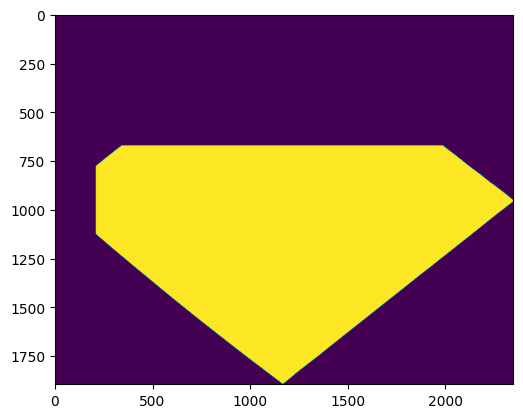

In [34]:
plt.imshow(~nan_mask)

In [35]:
emit = np.clip(emit[~nan_mask, :], 0, 1)
eco = eco[~nan_mask]

emit = emit[:, np.sum(emit, axis=(0)) > 0]

emit.shape, eco.shape

((1641546, 244), (1641546,))

In [36]:
pickle.dump(emit, open(emit_out_path, 'wb'))
pickle.dump(eco, open(ecostress_out_path, 'wb'))

In [38]:
emit = pickle.load(open('/content/drive/Shareddrives/emit-ecostress/Data/02_Resampling_ECOSTRESS_EMIT_Matchup/emit_002xSLT_clean.pkl', 'rb'))
emit = np.concatenate([emit, pickle.load(open('/content/drive/Shareddrives/emit-ecostress/Data/02_Resampling_ECOSTRESS_EMIT_Matchup/emit_002xSMT_clean.pkl', 'rb'))])
emit = np.concatenate([emit, pickle.load(open('/content/drive/Shareddrives/emit-ecostress/Data/02_Resampling_ECOSTRESS_EMIT_Matchup/emit_003xSLT_clean.pkl', 'rb'))])
emit = np.concatenate([emit, pickle.load(open('/content/drive/Shareddrives/emit-ecostress/Data/02_Resampling_ECOSTRESS_EMIT_Matchup/emit_003xSLU_clean.pkl', 'rb'))])
emit = np.concatenate([emit, pickle.load(open('/content/drive/Shareddrives/emit-ecostress/Data/02_Resampling_ECOSTRESS_EMIT_Matchup/emit_003xSMT_clean.pkl', 'rb'))])
emit.shape

(3891824, 244)

In [39]:
pickle.dump(emit, open('/content/drive/Shareddrives/emit-ecostress/Data/Train_Val_Test/emit_clean.pkl', 'wb'))

In [40]:
eco = pickle.load(open('/content/drive/Shareddrives/emit-ecostress/Data/02_Resampling_ECOSTRESS_EMIT_Matchup/ecostress_002xSLT_clean.pkl', 'rb'))
eco = np.concatenate([eco, pickle.load(open('/content/drive/Shareddrives/emit-ecostress/Data/02_Resampling_ECOSTRESS_EMIT_Matchup/ecostress_002xSMT_clean.pkl', 'rb'))])
eco = np.concatenate([eco, pickle.load(open('/content/drive/Shareddrives/emit-ecostress/Data/02_Resampling_ECOSTRESS_EMIT_Matchup/ecostress_003xSLT_clean.pkl', 'rb'))])
eco = np.concatenate([eco, pickle.load(open('/content/drive/Shareddrives/emit-ecostress/Data/02_Resampling_ECOSTRESS_EMIT_Matchup/ecostress_003xSLU_clean.pkl', 'rb'))])
eco = np.concatenate([eco, pickle.load(open('/content/drive/Shareddrives/emit-ecostress/Data/02_Resampling_ECOSTRESS_EMIT_Matchup/ecostress_003xSMT_clean.pkl', 'rb'))])
eco.shape

(3891824,)

In [41]:
pickle.dump(eco, open('/content/drive/Shareddrives/emit-ecostress/Data/Train_Val_Test/ecostress_clean.pkl', 'wb'))

In [42]:
emit = pickle.load(open('/content/drive/Shareddrives/emit-ecostress/Data/Train_Val_Test/emit_clean.pkl', 'rb'))

In [43]:
pickle.dump(emit[:int(emit.shape[0] * 0.6), :], open('/content/drive/Shareddrives/emit-ecostress/Data/Train_Val_Test/emit_train.pkl', 'wb'))
pickle.dump(emit[int(emit.shape[0] * 0.6):int(emit.shape[0] * 0.8), :], open('/content/drive/Shareddrives/emit-ecostress/Data/Train_Val_Test/emit_val.pkl', 'wb'))
pickle.dump(emit[int(emit.shape[0] * 0.8):, :], open('/content/drive/Shareddrives/emit-ecostress/Data/Train_Val_Test/emit_test.pkl', 'wb'))

In [44]:
eco = pickle.load(open('/content/drive/Shareddrives/emit-ecostress/Data/Train_Val_Test/ecostress_clean.pkl', 'rb'))

In [45]:
pickle.dump(eco[:int(eco.shape[0] * 0.6)], open('/content/drive/Shareddrives/emit-ecostress/Data/Train_Val_Test/ecostress_train.pkl', 'wb'))
pickle.dump(eco[int(eco.shape[0] * 0.6):int(eco.shape[0] * 0.8)], open('/content/drive/Shareddrives/emit-ecostress/Data/Train_Val_Test/ecostress_val.pkl', 'wb'))
pickle.dump(eco[int(eco.shape[0] * 0.8):], open('/content/drive/Shareddrives/emit-ecostress/Data/Train_Val_Test/ecostress_test.pkl', 'wb'))